# Семинар №2
## Выполнил: Поверинов И.В.
## Группа: ИДБ-22-10

# Задание

Цель исследования — проанализировать данных о бронировании рейсов, полученный с веб-сайта «Ease My Trip».

«Ease My Trip» — это онлайн-платформа для планирования путешествий, которая предоставляет возможности покупки железнодорожных билетов и авиабилетов, бронирования гостиниц, такси и автобусов, приобретения туристических пакетов. Тщательное изучение набора данных поможет найти ценную информацию, которая может иметь большое значение для потенциальных пассажиров. В рамках задания мы будем работать с данными об авиаперелетах.

### 1. Исследовать данные на наличие пропусков и дубликатов.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
data = pd.read_csv('Airlines.csv')
print(data.isnull().sum())
print(f"\nКоличество дубликатов: {data.duplicated().sum()}")

Unnamed: 0          0
airline             0
flight              0
source_city         0
departure_time      0
stops               0
arrival_time        0
destination_city    0
class               0
duration            0
days_left           0
price               0
dtype: int64

Количество дубликатов: 0


### 2. Узнать, изменяется ли стоимость перелёта в зависимости от авиакомпании?

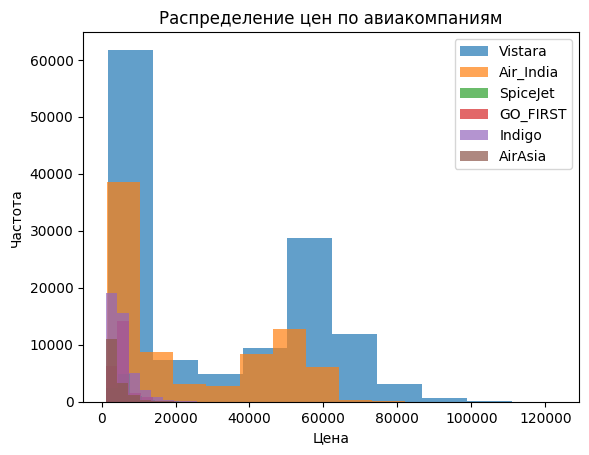

    Компания  Средняя цена
0    Vistara  30396.536302
1  Air_India  23507.019112
2   SpiceJet   6179.278881
3   GO_FIRST   5652.007595
4     Indigo   5324.216303
5    AirAsia   4091.072742


In [2]:
avg = data.groupby('airline')['price'].mean().sort_values(ascending=False)
for airline in avg.index:
    airline_data = data[data['airline'] == airline]
    plt.hist(airline_data['price'], alpha=0.7, label=airline)

plt.xlabel('Цена')
plt.ylabel('Частота')
plt.title('Распределение цен по авиакомпаниям')
plt.legend()
plt.show()

avgDATA = avg.reset_index()
avgDATA.columns = ['Компания', 'Средняя цена']
print(avgDATA)


### 3. Исследовать зависимость средней цены от количества дней до полёта.

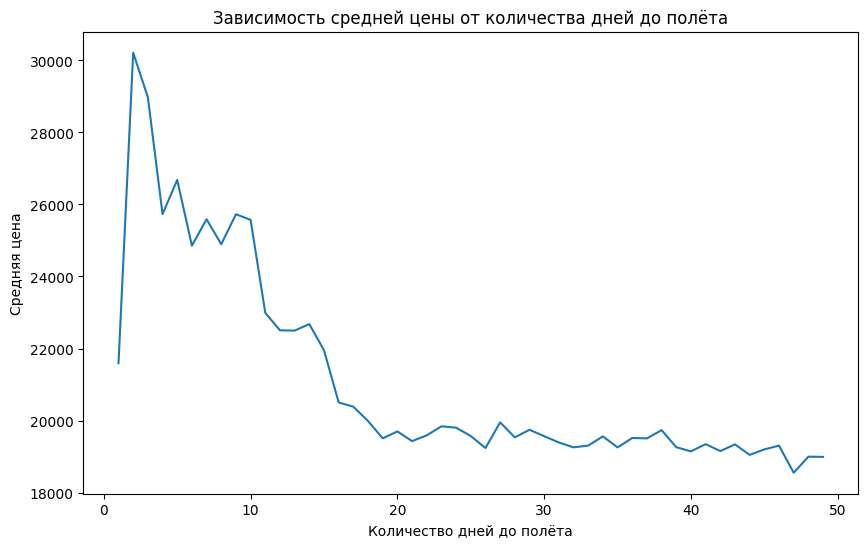

In [3]:
avgPriceDay = data.groupby('days_left')['price'].mean().reset_index()
cor = data['days_left'].corr(data['price'])
plt.figure(figsize=(10, 6))
plt.plot(avgPriceDay ['days_left'], avgPriceDay ['price'])
plt.xlabel('Количество дней до полёта')
plt.ylabel('Средняя цена')
plt.title('Зависимость средней цены от количества дней до полёта')
plt.show()


### 4. Исследовать зависимость средней цены полёта от его продолжительности.

Таблица продолжительности полёта (в часах) и средней цены:
 duration_hours        price
              1  3232.265202
              2  9420.952694
              3 11584.400636
              4  7113.145299
              5 13353.175331
              6 16009.599648
              7 17246.684175
              8 18688.566527
              9 18464.714046
             10 22045.380088
             11 22987.881221
             12 24636.734147
             13 26452.258281
             14 26722.501554
             15 26485.750594
             16 27764.054355
             17 27764.001171
             18 27416.888103
             19 26167.280978
             20 26218.718921
             21 27700.405911
             22 28457.878391
             23 26792.526051
             24 25112.428708
             25 23820.439858
             26 22385.104521
             27 23547.028615
             28 24105.808151
             29 22009.290960
             30 22118.472325
             31 17489.853047
             

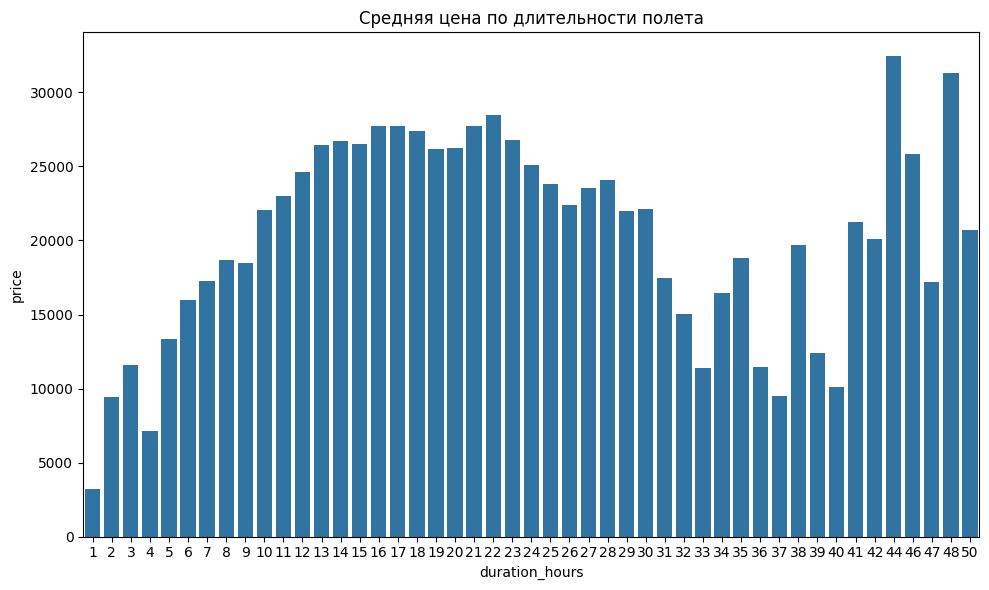

In [4]:

data['duration_hours'] = data['duration'].round().astype(int)
avgPriceDur = data.groupby('duration_hours')['price'].mean().reset_index()

print("Таблица продолжительности полёта (в часах) и средней цены:")
print(avgPriceDur.to_string(index=False))

cor = data['duration'].corr(data['price'])
print(f"\nКорреляция между длительностью полёта и ценой: {cor:.4f}")


fig, ax1 = plt.subplots(figsize=(10, 6))
sns.barplot(ax=ax1, x='duration_hours', y='price', data=avgPriceDur)
ax1.set_title('Средняя цена по длительности полета')
plt.tight_layout()
plt.show()



Нельзя забывать, что средняя цена зависит от многих факторов, не только от длительности полета, сезон, компания, класс и прочее. Поэтому результат может показаться странным.

### 5. Узнать, как меняется цена при изменении города вылета и пункта назначения?


Корреляционная матрица:
destination_city  Bangalore  Chennai  Delhi  Hyderabad  Kolkata  Mumbai
destination_city                                                       
Bangalore              1.00     0.96   0.65       0.96     0.91    0.94
Chennai                0.96     1.00   0.72       1.00     0.84    0.88
Delhi                  0.65     0.72   1.00       0.50     0.43    0.47
Hyderabad              0.96     1.00   0.50       1.00     0.92    0.95
Kolkata                0.91     0.84   0.43       0.92     1.00    0.98
Mumbai                 0.94     0.88   0.47       0.95     0.98    1.00

Матрица средних цен:
destination_city  Bangalore  Chennai    Delhi  Hyderabad  Kolkata   Mumbai
source_city                                                               
Bangalore               NaN 23321.85 17723.31   21226.12 23500.06 23128.62
Chennai            25081.85      NaN 18981.86   21591.35 22669.93 22765.85
Delhi              17880.22 19369.88      NaN   17347.29 20566.41 19355.83
Hy

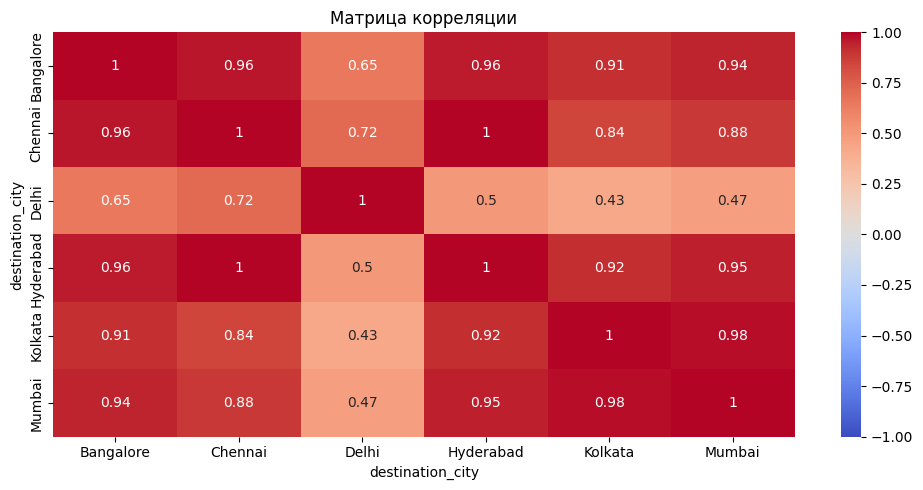

In [5]:
avgPriceCit = data.groupby(['source_city', 'destination_city'])['price'].mean().unstack(level=1)
cor = avgPriceCit.corr()
average_price = avgPriceCit

print("\nКорреляционная матрица:")
print(cor.to_string(float_format=lambda x: '{:.2f}'.format(x)))

print("\nМатрица средних цен:")
print(average_price.to_string(float_format=lambda x: '{:.2f}'.format(x)))

plt.figure(figsize=(10, 5))
sns.heatmap(cor, annot=True, cmap='coolwarm', vmin=-1, vmax=1, center=0)
plt.title('Матрица корреляции')
plt.tight_layout()
plt.show()


### 6. С помощью инструментов машинного обучения предсказать стоимость перелёта.
Если будете использовать несколько моделей, то провести сравнения обученных моделей, выбрать наилучшую (не забывайте про возможность переобучения моделей. Разница между полученными значениями на тренировочной и тестовой выборках не должна превышать 150–200 единиц).

In [6]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import GridSearchCV

data = pd.read_csv('Airlines.csv')
pd.set_option('future.no_silent_downcasting', True)
data['stops'] = data['stops'].replace({'zero': 0, 'one': 1, 'two_or_more': 2})
data['stops'] = data['stops'].astype(int)
data['stops'] = data['stops'].infer_objects(copy=False)

columns_to_remove = ['Unnamed: 0']
data = data.drop(columns=columns_to_remove)

unique_airplanes = data['flight'].unique()
airplane_mapping = dict(zip(unique_airplanes, range(len(unique_airplanes))))
data['flight'] = data['flight'].map(airplane_mapping)
data['flight'] = data['flight'].astype(int)

data['departure_time'] = data['departure_time'].replace({'Afternoon': 0, 'Early_Morning': 1, 'Evening': 2, 'Late_Night': 3, 'Morning': 4, 'Night': 5})
data['departure_time'] = data['departure_time'].astype(int)

data['arrival_time'] = data['arrival_time'].replace({'Afternoon': 0, 'Early_Morning': 1, 'Evening': 2, 'Late_Night': 3, 'Morning': 4, 'Night': 5})
data['arrival_time'] = data['arrival_time'].astype(int)

data['class'] = data['class'].replace({'Economy': 0, 'Business': 1})
data['class'] = data['class'].astype(int)

data['source_city'] = data['source_city'].replace({'Bangalore': 0, 'Chennai': 1, 'Delhi': 2, 'Hyderabad': 3, 'Kolkata': 4, 'Mumbai': 5})
data['source_city'] = data['source_city'].astype(int)

data['destination_city'] = data['destination_city'].replace({'Bangalore': 0, 'Chennai': 1, 'Delhi': 2, 'Hyderabad': 3, 'Kolkata': 4, 'Mumbai': 5})
data['destination_city'] = data['destination_city'].astype(int)

airline_mapping = {'Air_India': 0, 'AirAsia': 1, 'GO_FIRST': 2, 'Indigo': 3, 'SpiceJet': 4, 'Vistara': 5}
data['airline'] = data['airline'].replace(airline_mapping)
data['airline'] = data['airline'].astype(int)

def remove_outlier(df, column): # - Привет Kaggle)
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    return df[~((df[column] < (Q1 - 1.5 * IQR)) | (df[column] > (Q3 + 1.5 * IQR)))]
data = remove_outlier(data, 'price')

print(data.head(15))


    airline  flight  source_city  departure_time  stops  arrival_time  \
0         4       0            2               2      0             5   
1         4       1            2               1      0             4   
2         1       2            2               1      0             1   
3         5       3            2               4      0             0   
4         5       4            2               4      0             4   
5         5       5            2               4      0             0   
6         5       6            2               4      0             4   
7         5       7            2               0      0             2   
8         2       8            2               1      0             4   
9         2       9            2               0      0             2   
10        2      10            2               0      0             2   
11        2      11            2               4      0             0   
12        3      12            2               1   

In [7]:
features = data.drop(['price'], axis=1)
target = data['price']
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)


model = LinearRegression()
model.fit(X_train, y_train)
pred_lr_test = model.predict(X_test)
pred_lr_train = model.predict(X_train)
rmse_lr_test = mean_squared_error(y_test, pred_lr_test) ** 0.5
rmse_lr_train = mean_squared_error(y_train, pred_lr_train) ** 0.5
print(f'LNR RMSE Test : {rmse_lr_test}')
print(f'LNR RMSE Train : {rmse_lr_train}')
print(f'LNR Difference : {abs(rmse_lr_train - rmse_lr_test)}\n')

param_grid = {
    'max_depth': [100],
    'min_samples_split': [47],
    'min_samples_leaf': [33],
}

dtr = DecisionTreeRegressor()
grid_search = GridSearchCV(dtr, param_grid, cv=2, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)
best = grid_search.best_estimator_
best_params = grid_search.best_params_
best.fit(X_train, y_train)
pred_best_test = best.predict(X_test)
pred_best_train = best.predict(X_train)
rmse_best_test = np.sqrt(mean_squared_error(y_test, pred_best_test))
rmse_best_train = np.sqrt(mean_squared_error(y_train, pred_best_train))
print(f"DTR RMSE Test: {rmse_best_test}")
print(f"DTR RMSE Train: {rmse_best_train}")
difference = abs(rmse_best_train - rmse_best_test)
print(f"DTR Difference: {difference} \n")


rfr = RandomForestRegressor()
param_grid = {
    'max_depth': [110],
    'min_samples_split': [47],
    'min_samples_leaf': [33],
    'n_estimators': [100]
}
grid_search = GridSearchCV(rfr, param_grid, cv=2, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)
best_rfr = grid_search.best_estimator_
pred_rfr_test = best_rfr.predict(X_test)
pred_rfr_train = best_rfr.predict(X_train)
rmse_rfr_test = np.sqrt(mean_squared_error(y_test, pred_rfr_test))
rmse_rfr_train = np.sqrt(mean_squared_error(y_train, pred_rfr_train))
print(f'RFR RMSE Test : {rmse_rfr_test}')
print(f'RFR RMSE Train : {rmse_rfr_train}')
print(f'RFR Difference : {abs(rmse_rfr_train - rmse_rfr_test)} \n')

LNR RMSE Test : 6856.66568074861
LNR RMSE Train : 6883.793976173606
LNR Difference : 27.128295424996395

DTR RMSE Test: 2840.2494328943303
DTR RMSE Train: 2738.280849004835
DTR Difference: 101.96858388949522 

RFR RMSE Test : 2880.3322313405547
RFR RMSE Train : 2805.65968590336
RFR Difference : 74.67254543719491 



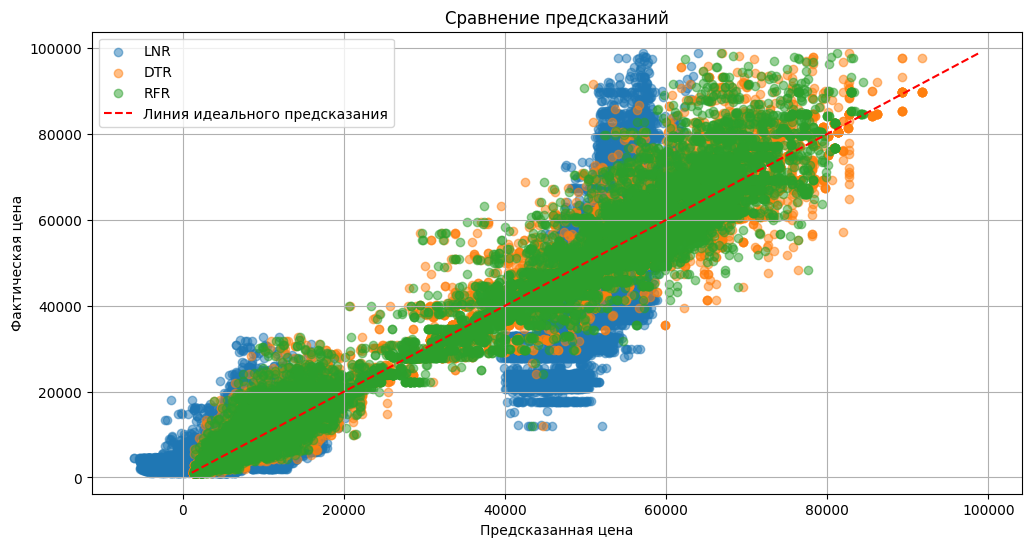

In [8]:
plt.figure(figsize=(12, 6))
plt.scatter(pred_lr_test, y_test, label='LNR', alpha=0.5)
plt.scatter(pred_best_test, y_test, label='DTR', alpha=0.5)
plt.scatter(pred_rfr_test, y_test, label='RFR', alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', label='Линия идеального предсказания')
plt.xlabel('Предсказанная цена')
plt.ylabel('Фактическая цена')
plt.title('Сравнение предсказаний')
plt.legend()
plt.grid(True)
plt.show()

Рассмотрим разные методы:
1.   LinearRegression() получили следующее:

LNR RMSE Test : 6856.66568074861

LNR RMSE Train : 6883.793976173606

LNR Difference : 27.128295424996395


2.   DecisionTreeRegressor() тут уже приемлимый результат:

Best parameters: {'max_depth': 100, 'min_samples_leaf': 33,'min_samples_split': 47}

**DTR RMSE Test: 2840.2516740674128**

DTR RMSE Train: 2738.280849004835

DTR Difference: 101.97082506257766

3. RandomForestRegressor() тут неплохая ситуация, но DTR показал себя лучше, RFR показал следующее:

RandomForestRegressor(max_depth=100, min_samples_split=47 , min_samples_leaf=33, n_estimators=100)

RFR RMSE Test : 2878.994641819099

RFR RMSE Train : 2805.169961524338

RFR Difference : 73.82468029476104


4. И самый забавный случай, если оставить поле Unnamed: 0, то при этих же параметрах будет следующее:

DTR RMSE Test: 2851.7196591457373

DTR RMSE Train: 2717.614860797772

DTR Difference: 134.10479834796524

5. И без функции remove_outlier() - которая нейтрализует выбросы в датасете( удаления аномальных значений (отклонений) из данных):

RFR RMSE Test : 2993.7127918443225

RFR RMSE Train : 2860.875948531458

RFR Difference : 132.8368433128644



### 7. Напишите вывод о проделанной работе, опишите EDA и результат обучения моделей.
(Для выполнения задания необходимо получить RMSE не более 3350 на тестовой выборке)

Результат работы:

Изучили новый датасет Airlines.csv, проверили дубликаты и пропуски в датасете.

Изучили и проанализировали зависимости в датасете, с помощью графиков и матриц.

И с помощью машинного обучения предсказывали стоимость перелетов, а также посмотрели разные модели:

LinearRegression() - показал небольшую переобучаемость модели, а также плохую эффективность в данном случае.

DecisionTreeRegressor() - лучший результат. Деревья решений смогли лучше адаптироваться к данным и уменьшить переобучение.

RandomForestRegressor()  -  показал хороший результат, демонстрируя способность к уменьшению переобучения и улучшению общей производительности относительно LinearRegression.

Интересная работа была, так как приходилось подбирать параметры для модели, а также повышать эффективность датасета, мог выбить значения куда лучше, но, честно, уже нет сил :D
